In [2]:
!uv sync --frozen --no-install-project --no-dev --no-cache

Audited 112 packages in 26ms


In [3]:
from statistics import mean

ege = [92, 82, 78, 84, 78, 72, 78, 78, 90, 80, 82, 78, 80, 84, 78, 96, 86, 70, 68, 92]
twims = [5, 5, 4, 4, 4, 3, 4, 4, 4, 4, 5, 3, 4, 3, 3, 4, 3, 4, 3, 3]
mean_ege = mean(ege)
mean_ege

81.3

In [4]:
mean_twims = mean(twims)
mean_twims

3.8

In [5]:
import pandas as pd

df = pd.DataFrame({"ege": ege, "twims": twims})
df.describe()

,ege,twims
count,20.000000,20.000000
mean,81.300000,3.800000
std,7.320483,0.695852
min,68.000000,3.000000
25%,78.000000,3.000000
50%,80.000000,4.000000
75%,84.500000,4.000000
max,96.000000,5.000000


In [6]:
# выборочная дисперсия
df["s20"] = df["ege"] - mean_ege
df["s20"] **= 2
df["s20"].describe()

count     20.000000
mean      50.910000
std       66.169858
min        0.490000
25%        7.290000
50%       10.890000
75%       93.490000
max      216.090000
Name: s20, dtype: float64

In [7]:
# Несмещенная выборочная дисперсия
df["s20"].mean() * 20 / 19

np.float64(53.58947368421053)

In [8]:
import numpy as np
# Выборочная дисперсия
np.var(df["ege"])

np.float64(50.910000000000004)

In [9]:
np.var(df["twims"])

np.float64(0.45999999999999996)

In [10]:
np.var(df["twims"]) * len(twims) / (len(twims) - 1)

np.float64(0.4842105263157894)

In [11]:
# построить график реализации выб. функции распределения связанной со СВ Y

In [12]:
from collections import Counter
print(*Counter(twims).items())
# смотрим количество оценок для подсчёта медианы через квантиль уровня 50% (потом посмотрел через df.describe) (11-ый элемент массива оценок)

(5, 3) (4, 10) (3, 7)


In [13]:
# найдём реализацию выборочной медианы
df['twims'].describe()
# 50% квантиль - 4.0

count    20.000000
mean      3.800000
std       0.695852
min       3.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: twims, dtype: float64

In [14]:
# найдём реализацию выб. коэффициента корреляции по выборкам порожд. СВ X и Y
df["corr"] = (df["ege"] * df["twims"] - df["ege"].mean() * df["twims"].mean()) / len(twims)
r_x_y = df["corr"].sum() / np.sqrt(np.var(df["ege"])) / np.sqrt(np.var(df["twims"]))
r_x_y

np.float64(0.2397052383297897)

In [26]:
df["corr"] = df["corr"] / df["corr"] * r_x_y
print(df["corr"][0])

0.2397052383297897


In [20]:
"""Анализ временного ряда через гистограммы"""
prices = pd.DataFrame(
    {
        'x': [
            504.63, 503.75, 502.5, 498.75, 500.25, 496.75, 498.5, 506.5, 507.25, 506.75, 512.75, 512.25, 514.75, 509.25, 508, 519.5, 519.75, 527, 519.5, 519.75, 527,
            519.5, 520.5, 510.75, 522.5, 524.25, 528.25, 534, 525, 503, 495, 500.75, 505.5, 519.25, 519.5, 522, 528.25, 530.25, 534.25, 529, 524.25, 531.75, 529.75
        ]
    }
)
# нижняя оценка и верхняя для фьючерсов, берём максимум
l = max(int(3.32 * np.log10(prices.size)), int(np.sqrt(prices.size)))
l

6

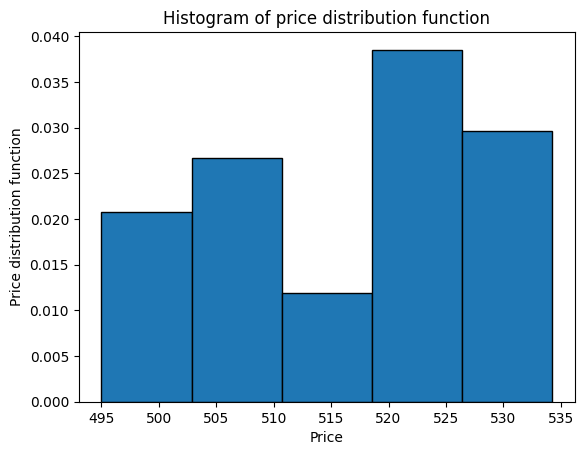

In [22]:
from matplotlib import pyplot as plt

prices['x'].plot(kind="hist", bins=l - 1, density=True, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Price distribution function")
plt.title("Histogram of price distribution function")
plt.show()